In [2]:
from yahoo_fin import stock_info as si
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ticker = "XLE"
startDate = '1/1/2001'
endDate = '2/3/2023'
df = si.get_data(ticker, start_date = startDate, end_date=endDate)

In [14]:
df = df.rename(columns={"adjclose":"adjusted_close"})
df

,open,high,low,close,adjusted_close,volume,ticker
2001-01-02,33.750000,34.109375,33.265625,33.265625,18.863026,398500,XLE
2001-01-03,33.562500,33.562500,32.250000,32.250000,18.287128,519100,XLE
2001-01-04,31.875000,32.250000,31.062500,31.250000,17.720083,386500,XLE
2001-01-05,31.250000,32.187500,31.250000,31.921875,18.101063,424600,XLE
2001-01-08,32.312500,32.312500,31.687500,31.812500,18.039057,371600,XLE
...,...,...,...,...,...,...,...
2023-01-27,92.610001,93.070000,91.080002,91.230003,91.230003,17393300,XLE
2023-01-30,90.570000,90.699997,89.019997,89.139999,89.139999,13762500,XLE
2023-01-31,88.839996,90.070000,87.930000,89.930000,89.930000,13924100,XLE
2023-02-01,89.510002,89.889999,87.000000,88.160004,88.160004,23483600,XLE


In [7]:
highest_swing = -1
lowest_swing = -1
for i in range(1,df.shape[0]-1):
    if df['high'][i] > df['high'][i-1] and df['high'][i] > df['high'][i+1] and (highest_swing == -1 or df['high'][i] > df['high'][highest_swing]):
        highest_swing = i
        
    if df['low'][i] < df['low'][i-1] and df['low'][i] < df['low'][i+1] and (lowest_swing == -1 or df['low'][i] < df['low'][lowest_swing]):
        lowest_swing = i

In [9]:
ratios = [0,0.236, 0.382, 0.5 , 0.618, 0.786,1]
colors = ["black","r","g","b","cyan","magenta","yellow"]
levels = []
max_level = df['high'][highest_swing]
min_level = df['low'][lowest_swing]
for ratio in ratios:
    if highest_swing > lowest_swing: # Uptrend
        levels.append(max_level - (max_level-min_level)*ratio)
    else: # Downtrend
        levels.append(min_level + (max_level-min_level)*ratio)

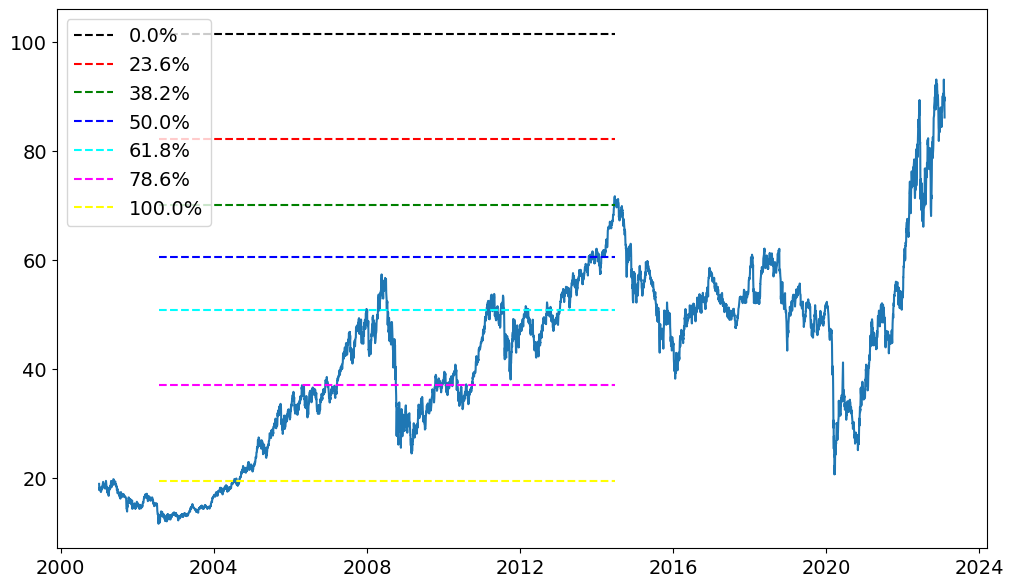

In [15]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
plt.plot(df['adjusted_close'])
start_date = df.index[min(highest_swing,lowest_swing)]
end_date = df.index[max(highest_swing,lowest_swing)]
for i in range(len(levels)):
    plt.hlines(levels[i],start_date, end_date,label="{:.1f}%".format(ratios[i]*100),colors=colors[i], linestyles="dashed")
plt.legend()
plt.show()

In [16]:
from eodhd import EODHDGraphs
graphs = EODHDGraphs()

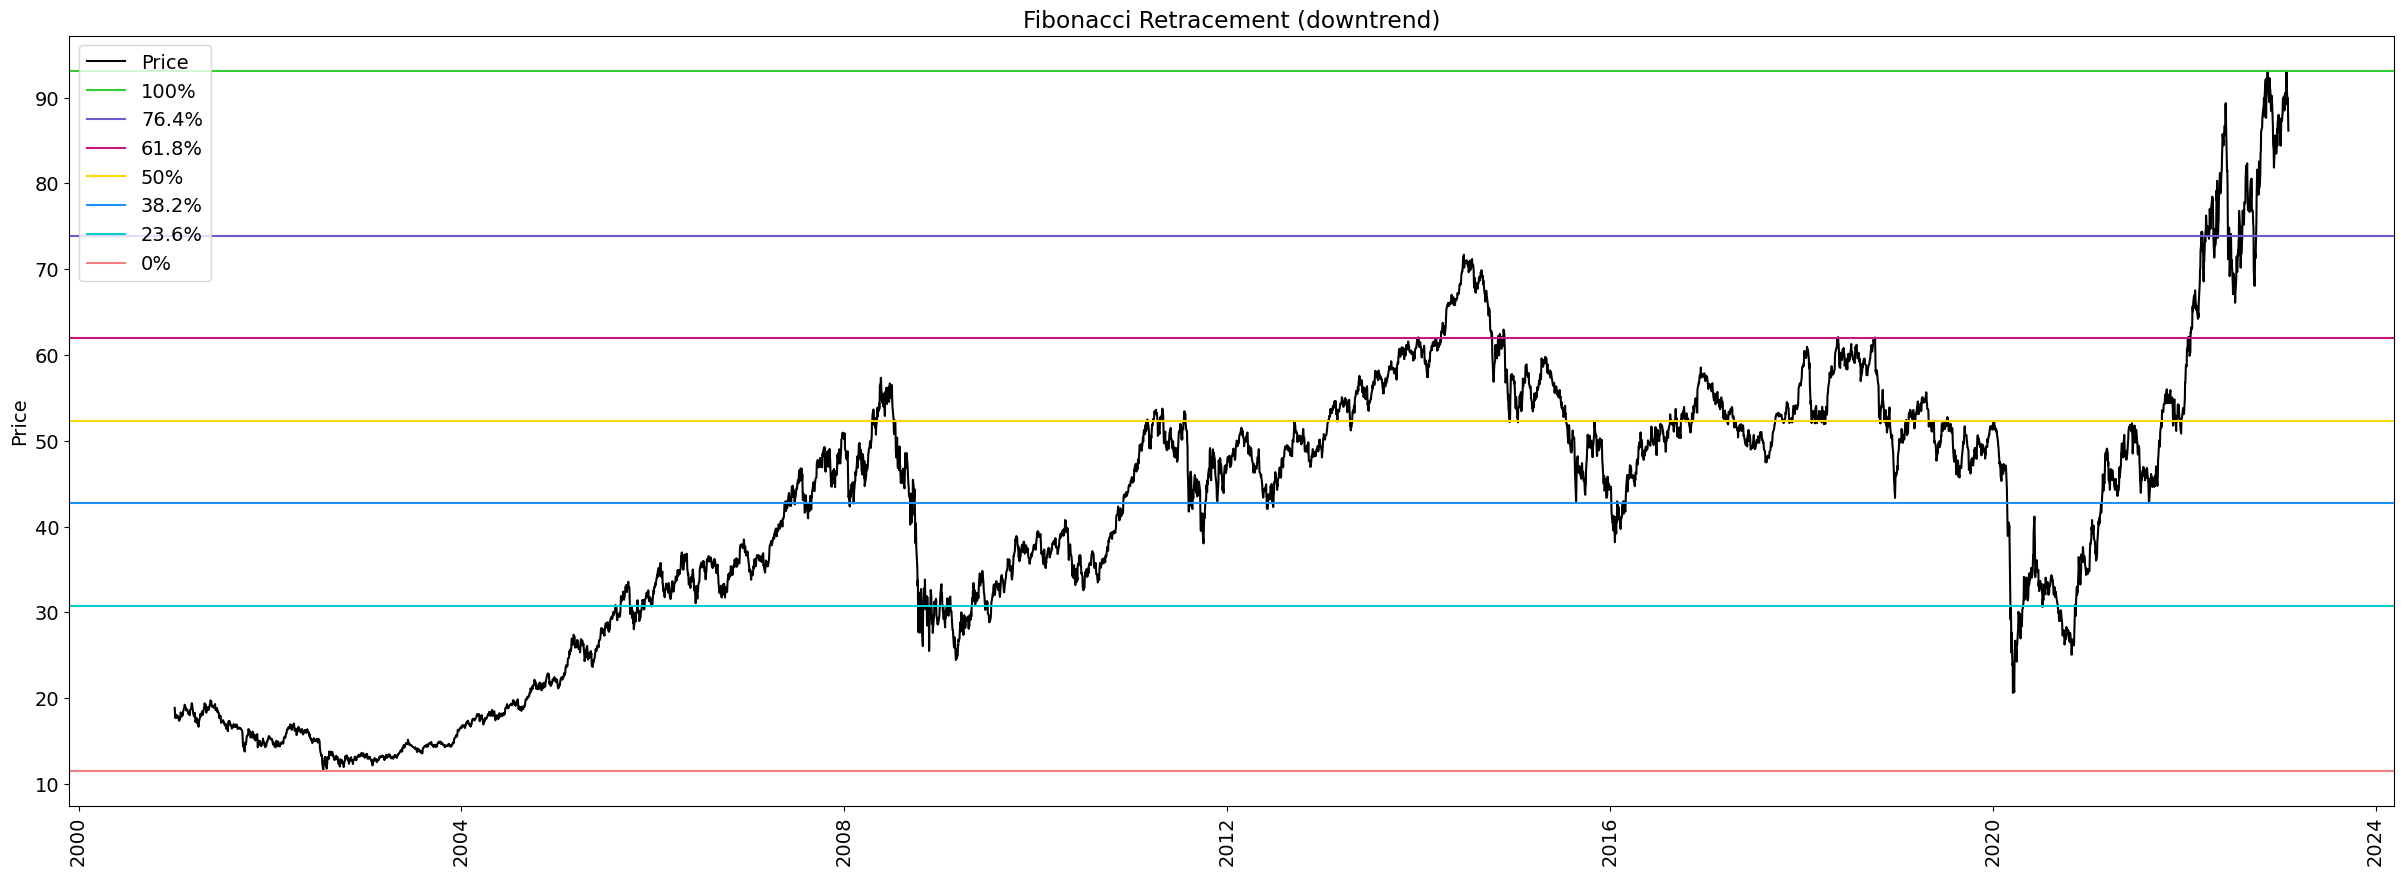

In [17]:
graphs.fibonacci_retracement(df, "downtrend", "adjusted_close")

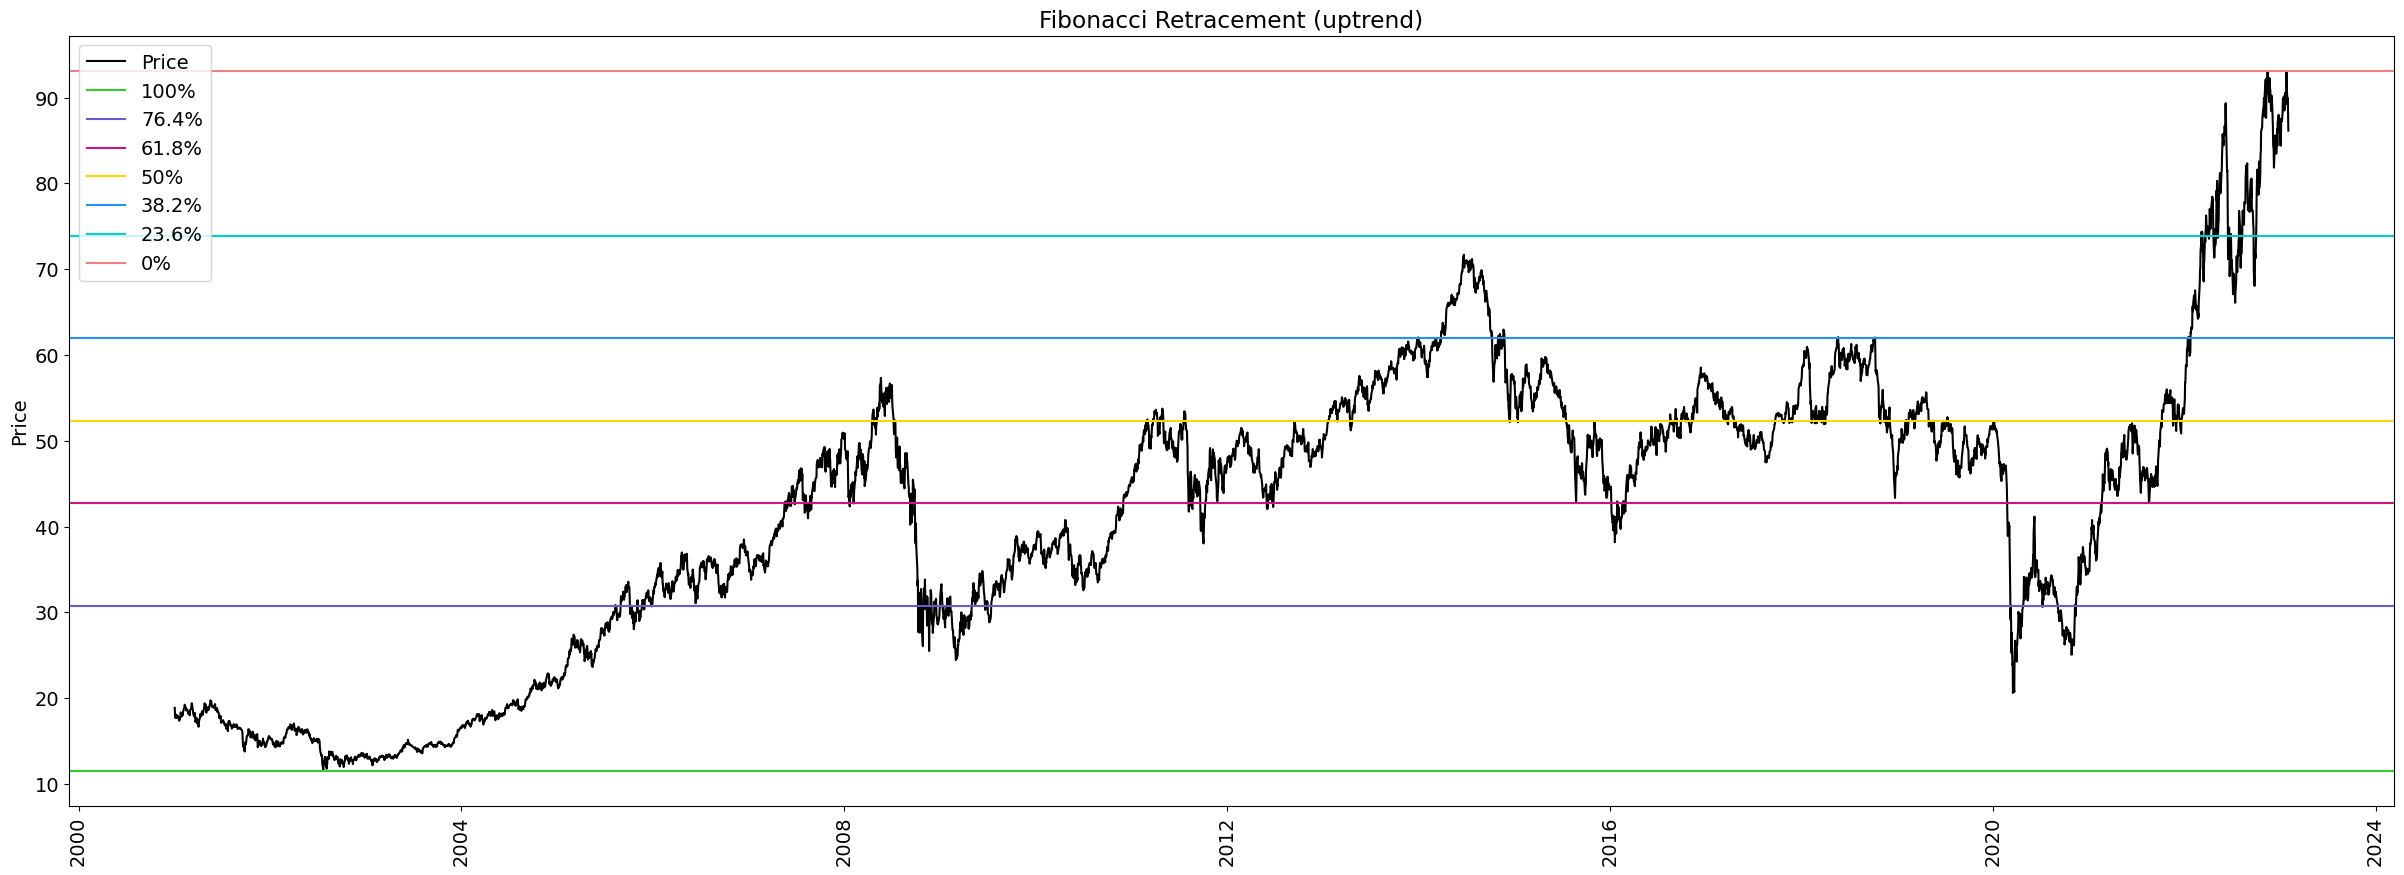

In [18]:
graphs.fibonacci_retracement(df, "uptrend", "adjusted_close")